In [ ]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
assert len(tf.config.list_physical_devices('GPU')) > 0

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.3.0-py3-none-any.whl size=2117305 sha256=785e6c94a5f341b2ff5fc5de0a4adaa9bc77d163964ccce76bd3f3308e80c4ba
  Stored in directory: /root/.cache/pip/wheels/9c/9f/b5/0e31f83bc60a83625e37429f923934e26802d0d68cf3ef3216
Successfully built mitdeeplearning


In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11490434/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


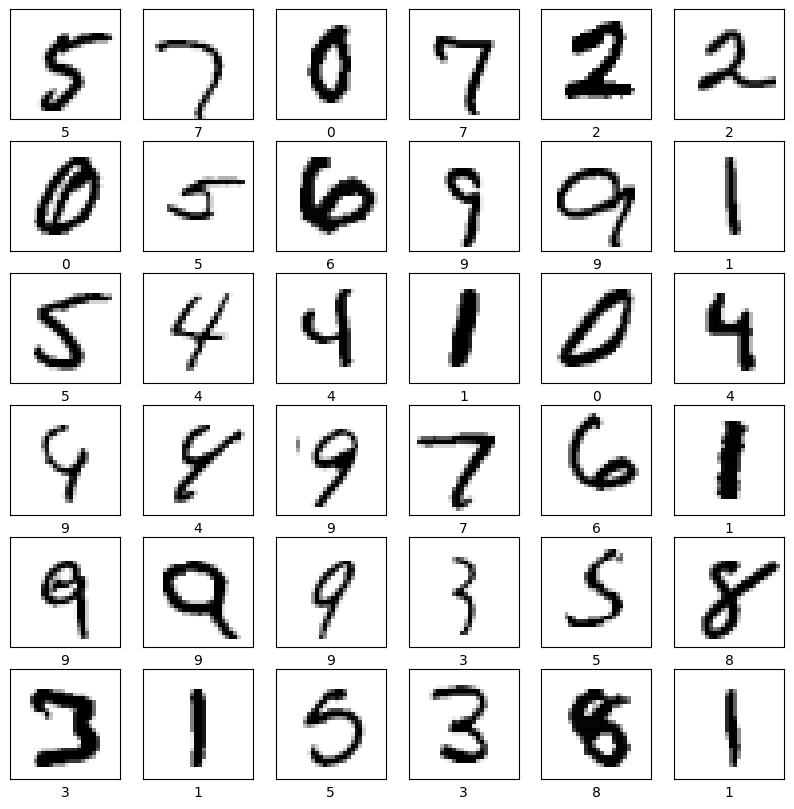

In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [ ]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
      
  ])
  return fc_model

model = build_fc_model()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 8s 3ms/step - loss: 0.3708 - accuracy: 0.8975
Epoch 2/5
938/938 [==============================] - 2s 3ms/step - loss: 0.1952 - accuracy: 0.9447
Epoch 3/5
938/938 [==============================] - 5s 6ms/step - loss: 0.1477 - accuracy: 0.9580
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1206 - accuracy: 0.9663
Epoch 5/5
938/938 [==============================] - 4s 5ms/step - loss: 0.1018 - accuracy: 0.9707


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1048 - accuracy: 0.9690
Test accuracy: 0.968999981880188


In [ ]:

def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model


In [ ]:
cnn_model = build_cnn_model()
cnn_model.predict(train_images[[0]])
print(cnn_model.summary())
     

1/1 [==============================] - 4s 4s/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 900)               0         
                                                                 
 den

In [ ]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 7s 4ms/step - loss: 0.1779 - accuracy: 0.9481
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0514 - accuracy: 0.9842
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0355 - accuracy: 0.9889
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0256 - accuracy: 0.9918
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0204 - accuracy: 0.9934


In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.0383 - accuracy: 0.9875


In [ ]:
print('Test accuracy:', test_acc)

Test accuracy: 0.987500011920929


In [ ]:
predictions = cnn_model.predict(test_images)
np.argmax(predictions[1])

313/313 [==============================] - 1s 2ms/step


2